# **Task 4**

## **DJS Synapse Learning Period**
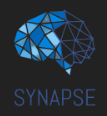

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Tasks/Week4/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df1 = df.copy()
df1 = df1.dropna()
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
perc = [.20, .40, .60, .80]
include = ['object', 'int']
df1.describe(percentiles = perc, include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
20%,26.000000,NaN,1.062602e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,36.000000,NaN,NaN
40%,33.000000,NaN,1.586820e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN


## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df1 = df1.drop(columns=['education-num', 'relationship'])
df1

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
df1['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
#Write your code here
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df1['marital-status']= label_encoder.fit_transform(df1['marital-status'])

df1['marital-status'].unique()

array([4, 2, 0, 3, 5, 1, 6])

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df1['income'] = label_encoder.fit_transform(df1['income'])
df1.income.unique()

array([0, 1])

In [ ]:
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['sex'] = label_encoder.fit_transform(df1['sex'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
target = df1.income
target

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
df1['native-country'].unique()

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

In [ ]:
from sklearn.model_selection import train_test_split
df1 = df1.drop(columns='income')
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size = 0.3)

In [ ]:
X_train

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
18891,36,0,359249,15,5,0,2,1,0,0,40,38
28348,59,3,122390,15,2,3,4,1,0,1977,48,38
18709,54,4,46704,11,2,4,4,1,0,0,60,38
10615,69,1,61958,11,2,2,4,1,1424,0,6,38
32013,61,2,179743,11,2,2,4,1,0,2051,20,38
...,...,...,...,...,...,...,...,...,...,...,...,...
16051,54,2,221915,14,4,9,4,0,0,0,65,38
11079,35,2,150057,15,2,3,4,1,0,0,40,38
15636,50,2,172511,15,2,2,4,1,0,0,40,38
21463,47,2,238185,9,0,0,4,0,0,0,40,38


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
regress = LogisticRegression()
regress.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = regress.predict(X_test)

Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
print("Logistic Regression")
# Check accuracy
score0 = accuracy_score(y_test, pred)
print(f'Accuracy: {score0}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Logistic Regression
Accuracy: 0.7785390650900652
Confusion Matrix:
[[6373  385]
 [1619  672]]


# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

print("Naive Bayes Algorithm")
# Check accuracy
score1 = accuracy_score(y_test, pred)
print(f'Accuracy: {score1}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Naive Bayes Algorithm
Accuracy: 0.7866062548347884
Confusion Matrix:
[[6386  372]
 [1559  732]]


# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
DecisionReg = DecisionTreeClassifier()
DecisionReg.fit(X_train,y_train)
y_pred4 = DecisionReg.predict(X_test)
y_pred4

array([0, 0, 0, ..., 1, 0, 0])

<b>Print the Model Accuracy</b>

In [ ]:
from sklearn.metrics import accuracy_score
score2 = accuracy_score(y_pred4,y_test)
print(score2)

0.806276936678086


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
DecisionReg = DecisionTreeClassifier()
DecisionReg.fit(X_train,y_train)
pred = DecisionReg.predict(X_test)
print("Decision Tree")
# Check accuracy
score3 = accuracy_score(y_test, pred)
print(f'Accuracy: {score3}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Decision Tree
Accuracy: 0.8043982760526025
Confusion Matrix:
[[5842  916]
 [ 854 1437]]


## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans: In **Logistic Regression** the dataset is linearly separated a good model based on logistic regression uses a data which can be separated linearly for example it is in 1s and 0s or a clear separating boundary can be created between different types of data.

In **Naive Bayes**, the model predicts the outcome on the basis of probability it gets to know the features of the existing classes and then separates them out on the basis of their similarity. This algorithm is best suited when the features of all the classes is completey different for example when the classes to be distinguished are cats, birds and humans.

In **Decision Tree**, in this algorithm the data is divided into smaller parts or leafs until pure sets are obtained. This algorithm is best suited for when there is no linear connection between the data. But this is a complex algorithm to perform on large dataset so it is advisable to use this on smaller datasets.


### Mention some real life use cases for each of these three models:


Ans:

**Logistic Regression:** Sports analysis

**Naive Bayes:** Spam mail filtering

**Decision Tree:** Marketing sorting out potential customers based on specific features.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
# Define the parameter grid to tune the hyperparameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid,
                           cv=5, n_jobs=1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
best_params = grid_search.best_params_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, m

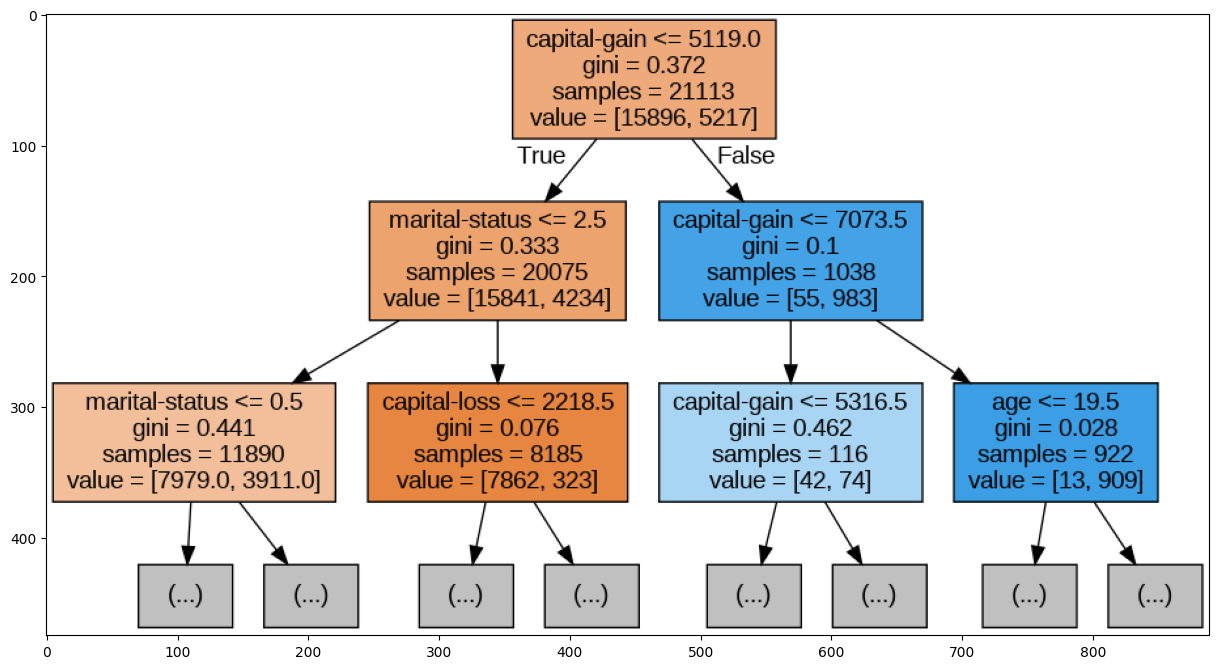

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
decision_tree = tree.export_graphviz(DecisionReg, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,50))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
from sklearn.metrics import accuracy_score
y_pred5 = dt_model.predict(X_test)
scoredt = accuracy_score(y_pred5,y_test)
print(scoredt)

0.8024091059785612


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Some of the parameters used are:

max-depth: Specifies the depth of the decision tree.If the value is too high the model gets overfit and if it is too low it will be underfit.This is a very important hyperparameter.Finding balance is important
min-sample-split: It decided whether to split depending on min-sample-split value.If the value is too low it wont biforcate furter even though max depth may be more.
min-sample-leaf: Works similar to min-sample-split.In this we define one step before.

Ans:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
import numpy as np
#implement Random forest
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
# number of features to consider at every split
max_features=['auto', 'sqrt']
max_depth = [2,4]
# min number of samples required to split the node
min_samples_split = [2,5]
# min number of samples required at each leaf node
min_samples_leaf = [1,2]
# method of selecting sample for each tree
bootstrap = [True, False]

grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
376 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 72}

In [ ]:
print(rf_grid.score(X_train, y_train))
scorerf = rf_grid.score(X_test, y_test)
print(scorerf)

0.8138587600056837
0.8089291634434744


### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans: Decision tree can get overfit very easily other than that major differences in both these are in performance and accuracy.
in cases of linear or near linear datasets or very small datasets the output of rf and dt are almost the same

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(dt_model, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
bc = bc.fit(X_train, y_train)
print(bc.score(X_train,y_train))
scorebc = bc.score(X_test,y_test)
print(scorebc)

0.9509307061999716
0.8531329428666151


### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans: rf is a specialised form of bagging which is done on dt also rf adds diversity or randomness to the feature selection process. bagging helps in reducing the chances of overfitting the model and also when the dt isnt used as bagging has versatility and handles noisy data very well.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

print(np.mean(cross_val_score(abc,X_train,y_train,scoring='accuracy',cv=10)))
scoreabc = np.mean(cross_val_score(abc,X_test,y_test,scoring='accuracy',cv=10))
print(scoreabc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

0.8579556669250534


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

0.8524698088300005


Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
!pip install xgboost
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scorexgb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {scorexgb}')
print('Confusion Matrix:')
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:14:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8647364349651895
Confusion Matrix:
[[6303  455]
 [ 769 1522]]


### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans: AdaBoost (Adaptive Boosting) and XGBoost (Extreme Gradient Boosting) are both popular boosting algorithms used in machine learning.
Differences:
a) Complex, High-Dimensional Data
b) Larger Datasets
c) When Overfitting is a Concern
d) Missing Data Handling
e) Need for Faster Training
f) Custom Loss Functions

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
param_grid = {"ccp_alpha": ccp_alphas}
ccp_grid_alpha_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=10),
    scoring=make_scorer(accuracy_score),
    param_grid=param_grid
)
ccp_grid_alpha_search.fit(X_train, y_train)



KeyboardInterrupt: 

In [ ]:
ccp_grid_alpha_search.best_params_

In [ ]:
best_ccp_alpha_tree = ccp_grid_alpha_search.best_estimator_

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
best_decision_tree = tree.export_graphviz(best_ccp_alpha_tree, out_file='best_tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng best_tree.dot -o best_tree.png # to convert the file
image = plt.imread('best_tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
print(best_ccp_alpha_tree.score(X_train,y_train))
print(best_ccp_alpha_tree.score(X_test,y_test))

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

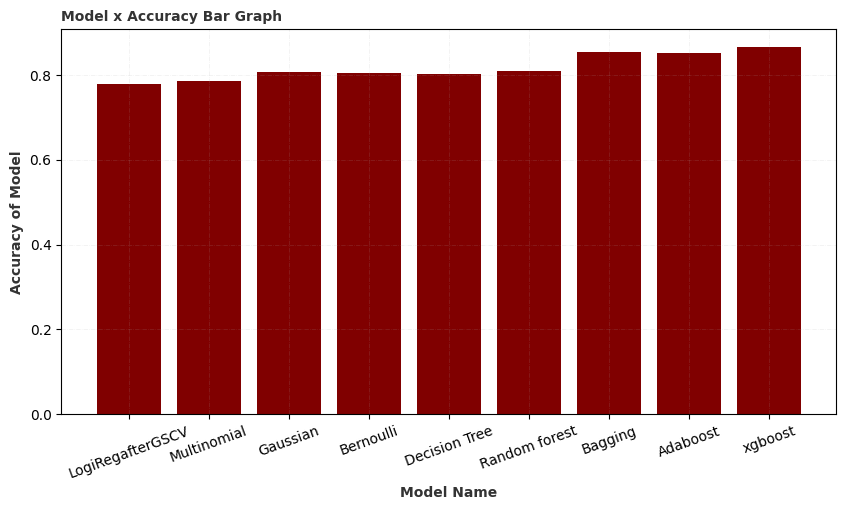

In [ ]:
#write your code here
import matplotlib.pyplot as plt
labels = ['LogiRegafterGSCV','Multinomial','Gaussian','Bernoulli','Decision Tree','Random forest','Bagging','Adaboost','xgboost']
values = [score0,score1,score2,score3,scoredt,scorerf,scorebc,scoreabc,scorexgb]

# creating the bar plot
fig,ax = plt.subplots(figsize = (10, 5))
plt.bar(labels, values,color ='maroon', width = 0.8)
plt.grid(linestyle ='-.', linewidth = 0.5,alpha = 0.2)
plt.xlabel("Model Name",fontsize = 10, fontweight ='bold',color ='#333333')
plt.ylabel("Accuracy of Model",fontsize = 10,
           fontweight ='bold',color ='#333333')
plt.xticks(rotation=20)
plt.title('Model x Accuracy Bar Graph',loc ='left', fontsize = 10,
          fontweight ='bold',color ='#333333')
plt.show()

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025